# BLG556E - Digital Solution for Smart Cities

Halit Uyanık - 504202506<br>
Kadir Şinas Kaynak - 504191525


In [37]:
import os
import sys
import urllib.request
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from utilities.PreProcessingUtil import preprocessing

In [38]:
#read pollutant values
# A N by T feature matrix, which describes the (f_1, .., f_T) speed records over T timesteps for the N sensors.
dfPollutant = pd.read_excel(
     "datasets/training/umraniye_combined.xlsx",
     engine='openpyxl',
     parse_dates=True,
     thousands='.'
)



In [39]:
dfPollutant

,Unnamed: 0,Tarih,PM10 ( µg/m3 ),SO2 ( µg/m3 ),CO ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),O3 ( µg/m3 ),PM 2.5 ( µg/m3 ),DATE_TIME,OBSERVATORY_NAME,AVERAGE_TEMPERATURE,AVERAGE_HUMIDITY,AVERAGE_WIND,AVERAGE_DIRECTIONOFWIND,AVERAGE_PRECIPITATION,AVERAGE_ROAD_TEMPERATURE
0,0,2020-01-01 00:00:56,44.400002,6.300000,0,92.199997,217.399994,3.100000,33.400002,2020-01-01 00:00:00,UMRANIYE,7.56148,99.99792,0.00000,258.60417,0.0,5.13750
1,1,2020-01-01 01:00:56,41.599998,5.900000,0,95.300003,223.600006,3.000000,39.599998,2020-01-01 01:00:00,UMRANIYE,7.42827,99.99831,0.00000,267.05085,0.0,4.90000
2,2,2020-01-01 02:00:56,59.500000,5.900000,0,78.000000,141.500000,6.800000,42.200001,2020-01-01 02:00:00,UMRANIYE,6.87673,99.76102,0.00000,270.44068,0.0,4.62203
3,3,2020-01-01 03:00:56,45.500000,5.500000,0,51.700001,12.800000,14.600000,36.599998,2020-01-01 03:00:00,UMRANIYE,6.01190,96.33966,0.00000,282.00000,0.0,4.27586
4,4,2020-01-01 04:00:56,25.700001,5.900000,0,82.699997,90.599998,5.600000,34.000000,2020-01-01 04:00:00,UMRANIYE,5.97140,97.14167,0.00000,282.00000,0.0,4.66500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,10003,2021-02-20 19:00:56,53.299999,52.599998,0,158.699997,26.500000,32.200001,9.300000,2021-02-20 19:00:00,UMRANIYE,3.03206,100.00000,2.09898,63.18367,0.0,1.15714
10004,10004,2021-02-20 20:00:56,45.700001,49.700001,0,180.000000,32.000000,47.299999,9.700000,2021-02-20 20:00:00,UMRANIYE,3.08695,100.00000,2.49364,70.89091,0.0,0.76000
10005,10005,2021-02-20 21:00:56,44.900002,7.300000,0,178.300003,31.600000,16.600000,12.100000,2021-02-20 21:00:00,UMRANIYE,3.08978,100.00000,2.23963,60.50000,0.0,0.54630
10006,10006,2021-02-20 22:00:56,33.099998,7.500000,0,147.300003,28.000000,28.500000,9.000000,2021-02-20 22:00:00,UMRANIYE,2.67189,100.00000,1.54585,46.00000,0.0,0.13774


In [40]:
# select columns
#dfPollutant = dfPollutant[['PM10 ( µg/m3 )','SO2 ( µg/m3 )', 'CO ( µg/m3 )', 'NO2 ( µg/m3 )', 'NOX ( µg/m3 )', 'O3 ( µg/m3 )', 'PM 2.5 ( µg/m3 )', 'AVERAGE_TEMPERATURE','AVERAGE_HUMIDITY', 'AVERAGE_WIND', 'AVERAGE_DIRECTIONOFWIND','AVERAGE_PRECIPITATION', 'AVERAGE_ROAD_TEMPERATURE']]


# select all pollutant
#dfPollutant = dfPollutant[['PM10 ( µg/m3 )','SO2 ( µg/m3 )','CO ( µg/m3 )', 'NO2 ( µg/m3 )', 'NOX ( µg/m3 )', 'O3 ( µg/m3 )', 'PM 2.5 ( µg/m3 )']]

# select all meteology
dfPollutant = dfPollutant[['PM10 ( µg/m3 )','AVERAGE_TEMPERATURE','AVERAGE_HUMIDITY', 'AVERAGE_WIND', 'AVERAGE_DIRECTIONOFWIND','AVERAGE_PRECIPITATION','AVERAGE_ROAD_TEMPERATURE']]

#dfPollutant = dfPollutant[['PM10 ( µg/m3 )','AVERAGE_ROAD_TEMPERATURE']]

In [41]:
##only pollution values
#
##remove index column
#dfPollutant = dfPollutant.iloc[: , 1:] 
#
##dataset info
#time_len, num_pol = dfPollutant.shape
#print("No. of pollution:", num_pol-1, "\nNo of timesteps:", time_len)
#
#dfPollutant = dfPollutant.iloc[-20000:,:]
#dfPollutant=preprocessing(dfPollutant)

In [42]:
#values = dfPollutant.values
## specify columns to plot
#groups = [0, 1, 2, 3, 5, 6]
#i = 1
## plot each column
#plt.figure(figsize=(12, 8), dpi=100)
#for group in groups:
#	pyplot.subplot(len(groups), 1, i)
#	pyplot.plot(values[:, group])
#	pyplot.title(dfPollutant.columns[group], y=0.5, loc='right')
#	i += 1
#pyplot.show()

In [43]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [44]:
# load dataset
values = dfPollutant.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.122083   0.298335   0.999990        0.0   0.736012   0.622642   
2   0.114115   0.294645   0.999991        0.0   0.760145   0.622642   
3   0.165054   0.279369   0.998799        0.0   0.769830   0.622642   
4   0.125213   0.255414   0.981606        0.0   0.802857   0.622642   
5   0.068867   0.254293   0.985636        0.0   0.802857   0.622642   

   var7(t-1)   var1(t)   var2(t)   var3(t)  var4(t)   var5(t)   var6(t)  \
1   0.183452  0.114115  0.294645  0.999991      0.0  0.760145  0.622642   
2   0.179355  0.165054  0.279369  0.998799      0.0  0.769830  0.622642   
3   0.174560  0.125213  0.255414  0.981606      0.0  0.802857  0.622642   
4   0.168588  0.068867  0.254293  0.985636      0.0  0.802857  0.622642   
5   0.175301  0.066591  0.247769  0.999992      0.0  0.802857  0.622642   

    var7(t)  
1  0.179355  
2  0.174560  
3  0.168588  
4  0.175301  
5  0.172149  


In [45]:
#reframed = reframed[['var1(t-1)', 'var2(t-1)',  'var3(t-1)',  'var4(t-1)',  'var5(t-1)',  'var6(t-1)',  'var7(t-1)',  'var8(t-1)',  'var9(t-1)','var10(t-1)',  'var11(t-1)',  'var12(t-1)',  'var13(t-1)', 'var1(t)']]

# all pollutant and meteorology
reframed = reframed[['var1(t-1)', 'var2(t-1)',  'var3(t-1)',  'var4(t-1)',  'var5(t-1)',  'var6(t-1)',  'var7(t-1)', 'var1(t)']]

#reframed = reframed[['var1(t-1)', 'var2(t-1)', 'var1(t)']]

In [46]:
train_rate = 0.8
# split into train and test sets
values = reframed.values
n_train_hours = reframed.shape[0] * train_rate
int(n_train_hours)

8005

In [47]:
train_rate = 0.8
# split into train and test sets
values = reframed.values
n_train_hours = int(reframed.shape[0] * train_rate)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8005, 1, 7) (8005,) (2002, 1, 7) (2002,)


In [48]:
lstm_layer_sizes = 50
lstm_activations = "tanh"
loss='mae'
optimizer='adam'
n_epochs=50
batch_size=72
shuffle=False
verbose=2
# design network
model = Sequential()
model.add(LSTM(lstm_layer_sizes, activation=lstm_activations, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss=loss, optimizer=optimizer)
# fit network
history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=verbose, shuffle=shuffle)


Epoch 1/50
112/112 - 1s - loss: 0.0478 - val_loss: 0.0583
Epoch 2/50
112/112 - 0s - loss: 0.0398 - val_loss: 0.0575
Epoch 3/50
112/112 - 0s - loss: 0.0342 - val_loss: 0.0552
Epoch 4/50
112/112 - 0s - loss: 0.0289 - val_loss: 0.0421
Epoch 5/50
112/112 - 1s - loss: 0.0247 - val_loss: 0.0307
Epoch 6/50
112/112 - 0s - loss: 0.0224 - val_loss: 0.0289
Epoch 7/50
112/112 - 1s - loss: 0.0217 - val_loss: 0.0283
Epoch 8/50
112/112 - 1s - loss: 0.0219 - val_loss: 0.0280
Epoch 9/50
112/112 - 1s - loss: 0.0214 - val_loss: 0.0277
Epoch 10/50
112/112 - 0s - loss: 0.0215 - val_loss: 0.0279
Epoch 11/50
112/112 - 0s - loss: 0.0212 - val_loss: 0.0277
Epoch 12/50
112/112 - 0s - loss: 0.0210 - val_loss: 0.0279
Epoch 13/50
112/112 - 1s - loss: 0.0212 - val_loss: 0.0279
Epoch 14/50
112/112 - 0s - loss: 0.0208 - val_loss: 0.0277
Epoch 15/50
112/112 - 0s - loss: 0.0208 - val_loss: 0.0279
Epoch 16/50
112/112 - 0s - loss: 0.0209 - val_loss: 0.0278
Epoch 17/50
112/112 - 0s - loss: 0.0209 - val_loss: 0.0278
Epoch 

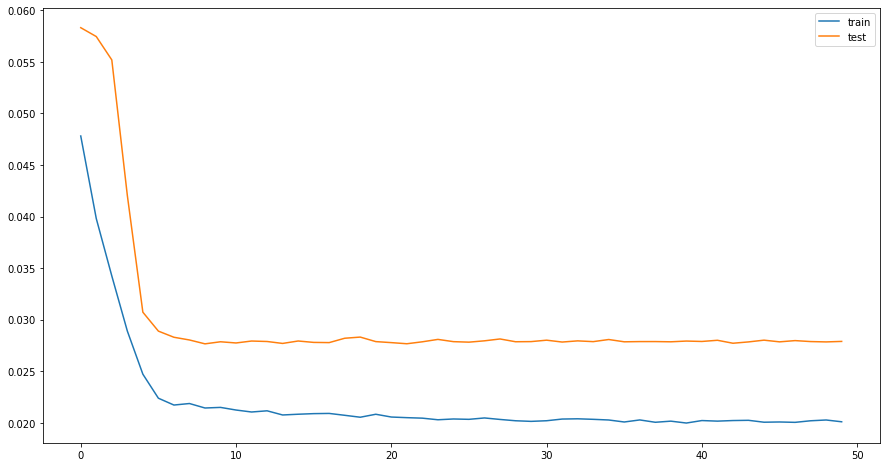

In [49]:
# plot history
fig = plt.figure(figsize=(15, 8))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [50]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [51]:
print(inv_y[:10])
print(inv_yhat[:10])

[ 43.7  39.4  23.6  44.7  41.8  52.9 121.  140.8 156.  137.1]
[ 67.84468   41.47549   37.853706  23.53501   42.824123  39.98871
  50.44457  117.572426 138.94908  155.09082 ]


In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(inv_y, inv_yhat) #y_true, y_pred
rmse = sqrt(mean_squared_error(inv_y, inv_yhat)) #y_true, y_pred
mase = sqrt(mean_absolute_error(inv_y, inv_yhat)) #y_true, y_pred

print('------------------------------------------\n')
print('MSE:',mse)
print('RMSE:',rmse)
print('MASE:',mase)
print('------------------------------------------')

------------------------------------------

MSE: 308.30444
RMSE: 17.5586002676573
MASE: 3.130761747688344
------------------------------------------


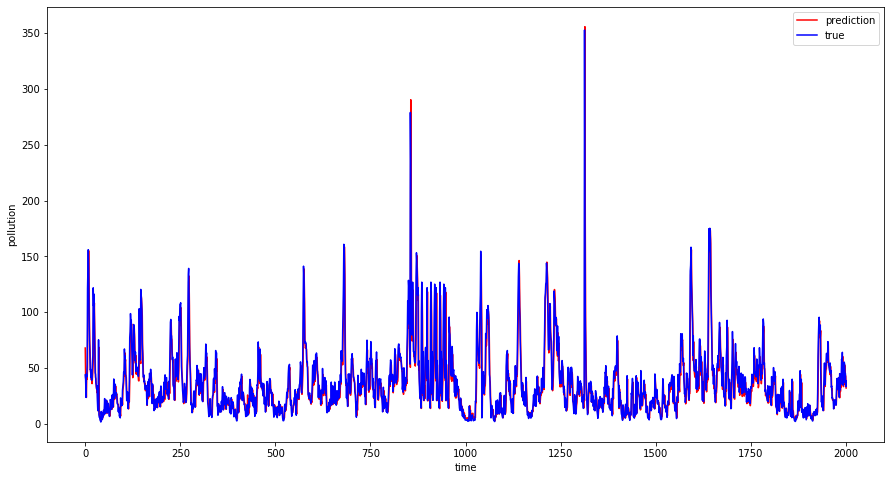

In [53]:
##all test result visualization
fig1 = plt.figure(figsize=(15, 8))
#    ax1 = fig1.add_subplot(1,1,1)
a_pred = inv_yhat[:]
a_true = inv_y[:]
plt.plot(a_pred, "r-", label="prediction")
plt.plot(a_true, "b-", label="true")
plt.xlabel("time")
plt.ylabel("pollution")
plt.legend(loc="best", fontsize=10)
plt.show()

In [54]:
# Output all results to a sub-directory
import datetime
import pathlib
import os
path = pathlib.Path().absolute()
time = datetime.datetime.now().strftime("%m-%d-%Y %H-%M-%S")
result_dir = os.path.join (path, "experiments", time)
os.mkdir (result_dir)

# Create the result txt file
f = open(result_dir + "/" + "summary.txt", "w")

# Write experiment parameters
f.write ("---------Experiment Parameters--------")
f.write ("\nTrain-Test split rate: " + str(train_rate))
f.write ("\nNumber of epochs: " + str(n_epochs))
f.write ("\nBatch size: " + str(batch_size))
f.write ("\nShuffle during training: " + str(shuffle))
f.write ("\nVerbose: " + str(verbose))
f.write ("\n---------------------------")

# Write dataset details
f.write ("\n---------Dataset Details--------")
time_len, pollution_len = dfPollutant.shape
f.write ("\nNo of pollution:" + str(pollution_len-1) + "\nNo of timesteps:" + str(time_len-1))
f.write ("\nTrain data: " + str(train.shape))
f.write ("\nTest data: " + str(test.shape))

f.write ("\nTrain data X: " + str(train_X.shape))
f.write ("\nTrain data Y: " + str(train_y.shape))
f.write ("\nTest data X: " + str(test_X.shape))
f.write ("\nTest data Y: " + str(test_y.shape))
f.write ("\n---------------------------")

# Write model details
f.write ("\n---------Model Details--------")
f.write ("\nLSTM layer sizes: " + str(lstm_layer_sizes))
f.write ("\nLSTM activation functions: " + str(lstm_activations))
f.write ("\nOptimizer: " + optimizer)
f.write ("\nLoss function: " + loss)
f.write ("\n---------------------------")

# Write results
f.write ('\nTest RMSE: %.3f' % rmse)

# Write visual outputs
fig.savefig (result_dir + "/" + "MAE-vs-Naive.png")
fig1.savefig (result_dir + "/" + "prediction-accuracy.png")

f.close ()